In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df = pd.read_excel('/content/Приложение 8 - Данные для пронозирования с кластерами по ценам.xlsx', sheet_name= "km0")

In [ ]:
df

,Дата,Мелкая бытовая техника,Акция
0,2016-03-01,"$4,034.96",$0.24
1,2016-03-02,"$4,590.03",$0.66
2,2016-03-03,"$4,202.33",$1.08
3,2016-03-04,"$4,411.55",$1.50
4,2016-03-05,"$4,523.62",$1.21
...,...,...,...
56,2016-04-26,"$4,282.17",$0.63
57,2016-04-27,"$4,672.88",$0.31
58,2016-04-28,"$5,136.40",$0.00
59,2016-04-29,"$4,826.89",$-0.17


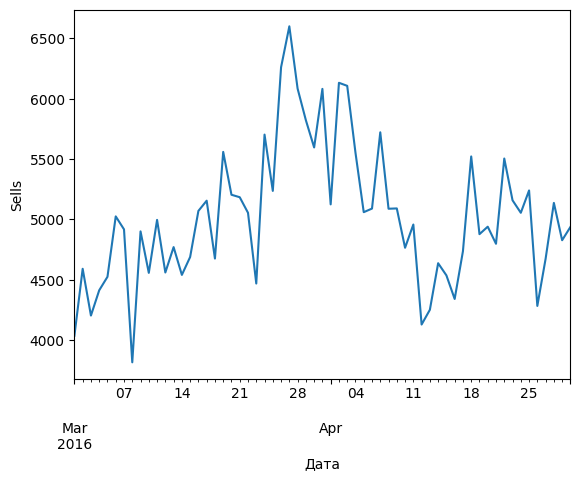

In [ ]:
import matplotlib.pyplot as plt
df.plot(x="Дата", y="Мелкая бытовая техника", legend=None)
plt.ylabel("Sells")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

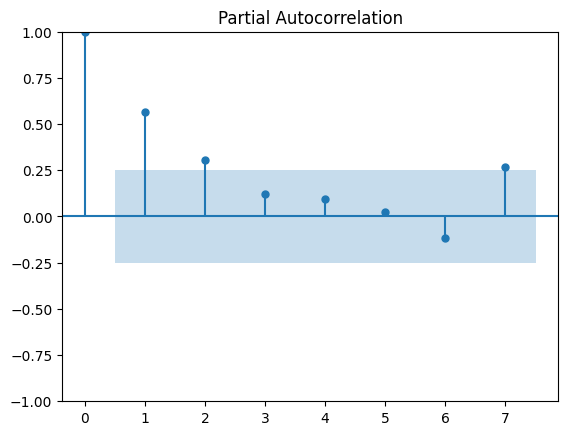

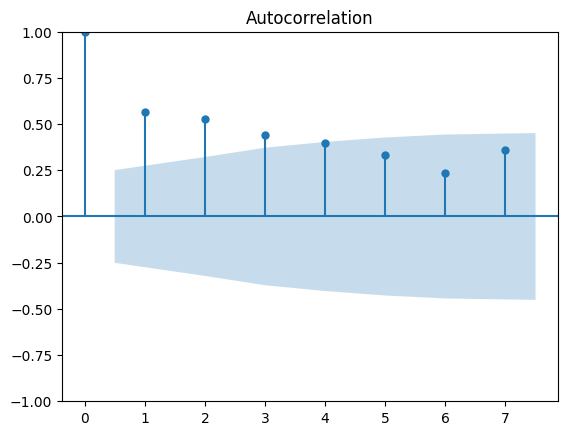

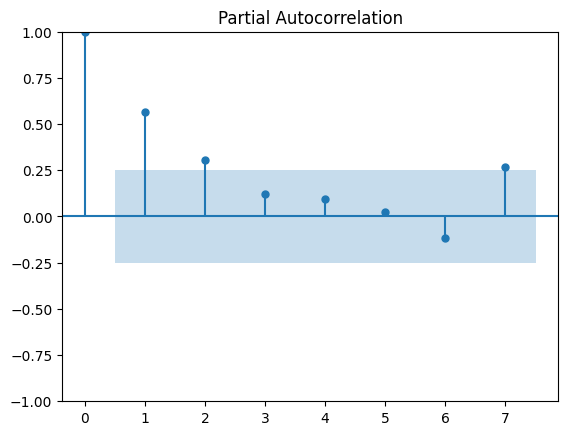

In [ ]:
y = df[['Мелкая бытовая техника']].to_numpy()

plot_acf(y, lags=7)
plot_pacf(y, method="ols",lags=7)

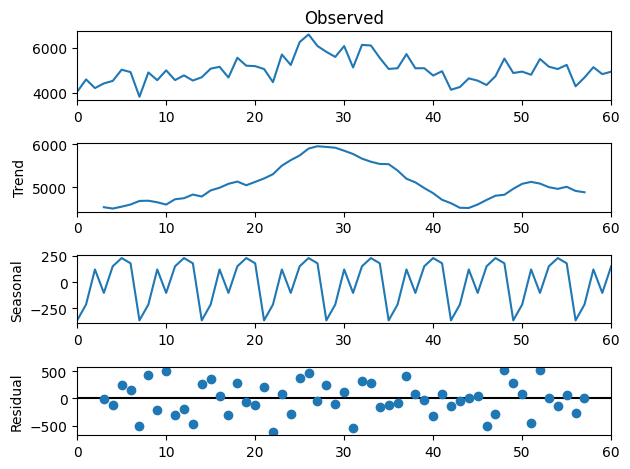

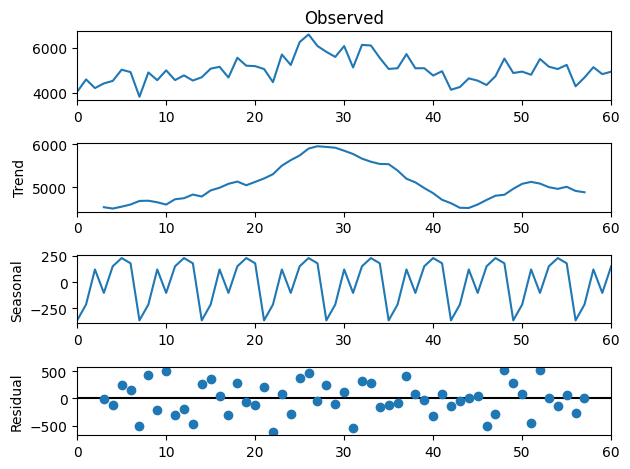

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(y, period = 7, model="additive")
decompose_data.plot()

In [ ]:
import statsmodels.api as sm
resDiff = sm.tsa.arma_order_select_ic(y, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (4, 2) is the best.


In [ ]:
df

,Дата,Мелкая бытовая техника,Акция
0,2016-03-01,"$4,034.96",$0.24
1,2016-03-02,"$4,590.03",$0.66
2,2016-03-03,"$4,202.33",$1.08
3,2016-03-04,"$4,411.55",$1.50
4,2016-03-05,"$4,523.62",$1.21
...,...,...,...
56,2016-04-26,"$4,282.17",$0.63
57,2016-04-27,"$4,672.88",$0.31
58,2016-04-28,"$5,136.40",$0.00
59,2016-04-29,"$4,826.89",$-0.17


In [ ]:
Y = df[['Мелкая бытовая техника']]
Y = Y[:-14]
X = df.iloc [:, 2]
X = X[:-14]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

# SARIMA

In [ ]:
def mape( actual , pred ): 
 actual, pred = np.array(actual), np.array(pred)
 return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
y3 = y.copy()
y3 = y3[:-14]
model2 = SARIMAX(y3, order=(1, 1, 1),seasonal_order=(1, 1, 1, 7))
model_fit = model2.fit(disp=False)
yhat1 = model_fit.predict(start=46, end = 60)

In [ ]:
y4 = np.append(y3, yhat1)

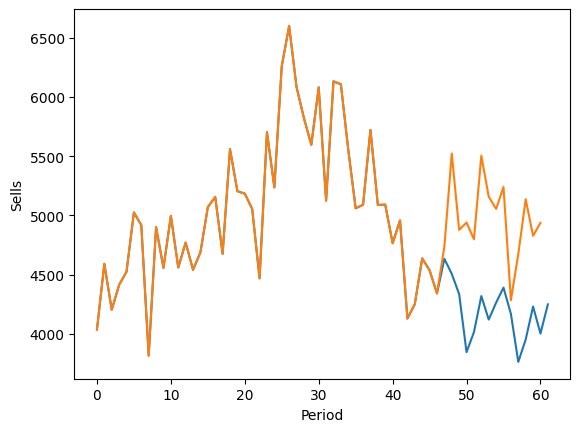

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
#plt.plot(y3)
plt.plot(y4)
plt.plot(y)

In [ ]:
mape(y[-14:],y4[-14:])

16.312788688357106

# SARIMAX

In [ ]:
exog = df.iloc [:, 2].to_numpy()
exog = exog[:-14]
exog1 = [-0.26, 0.53, 0.21, -0.62, -1.08, 0.53, 2.12, 3.7, 2.4, 1.11, 0.55, 0, -0.26, -0.53]

In [ ]:
y1 = y.copy()
y1 = y1[:-14]
model = SARIMAX(y1, order=(1, 1, 1),seasonal_order=(1, 1, 1, 7), exog = exog)
model_fit = model.fit(disp=False)
yhat = model_fit.predict(start=46, end = 60, exog = exog1)

In [ ]:
y2 = np.append(y1, yhat)

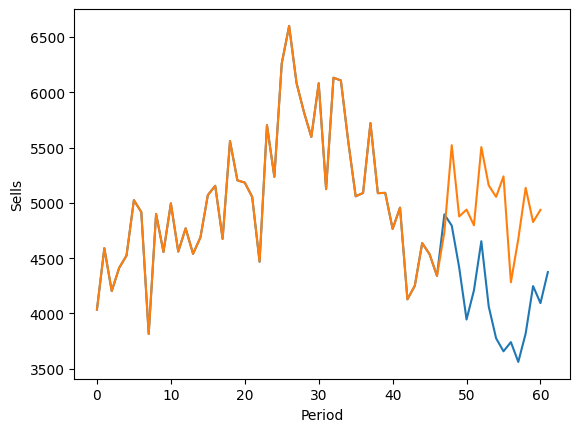

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
#plt.plot(y1)
plt.plot(y2)
plt.plot(y)

In [ ]:
y[-14:]

array([[4735.54794521],
       [5521.42405063],
       [4877.05415162],
       [4939.06734007],
       [4797.33673469],
       [5504.04276316],
       [5157.88235294],
       [5054.2720403 ],
       [5239.61559889],
       [4282.16878981],
       [4672.88253012],
       [5136.40221402],
       [4826.89219331],
       [4936.48101266]])

In [ ]:
y2[-14:]

array([4793.995445  , 4417.21633702, 3945.20137382, 4208.55501082,
       4653.38389328, 4063.1619271 , 3775.15767862, 3657.71939997,
       3740.74362304, 3561.64521699, 3819.10783986, 4247.59656273,
       4093.40912694, 4374.3746305 ])

In [ ]:
mape(y[-14:],y2[-14:])

17.657204327967317

# Prophet

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

In [ ]:
df = pd.read_excel('/content/Приложение 8 - Данные для пронозирования с кластерами по ценам.xlsx', sheet_name= "km8")

In [ ]:
df = df[['Дата', 'Мелкая бытовая техника']]

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of sells",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

In [ ]:
train_df = df[:-14] 

In [ ]:
m = Prophet()
m.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05y1sbso/rusd_37n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05y1sbso/d74q84o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1490', 'data', 'file=/tmp/tmp05y1sbso/rusd_37n.json', 'init=/tmp/tmp05y1sbso/d74q84o3.json', 'output', 'file=/tmp/tmp05y1sbso/prophet_modelp4leoer2/prophet_model-20230511155958.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:59:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=14)
forecast = m.predict(future)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-01,"$4,654.19","$3,425.27","$5,466.78","$4,654.19","$4,654.19",$-219.89,$-219.89,$-219.89,$-219.89,$-219.89,$-219.89,$0.00,$0.00,$0.00,"$4,434.31"
1,2016-03-02,"$4,667.66","$3,724.66","$5,813.18","$4,667.66","$4,667.66",$148.78,$148.78,$148.78,$148.78,$148.78,$148.78,$0.00,$0.00,$0.00,"$4,816.43"
2,2016-03-03,"$4,681.12","$3,617.85","$5,665.24","$4,681.12","$4,681.12",$-38.87,$-38.87,$-38.87,$-38.87,$-38.87,$-38.87,$0.00,$0.00,$0.00,"$4,642.26"
3,2016-03-04,"$4,694.59","$4,009.15","$6,031.59","$4,694.59","$4,694.59",$290.02,$290.02,$290.02,$290.02,$290.02,$290.02,$0.00,$0.00,$0.00,"$4,984.61"
4,2016-03-05,"$4,708.05","$3,627.41","$5,795.94","$4,708.05","$4,708.05",$-15.18,$-15.18,$-15.18,$-15.18,$-15.18,$-15.18,$0.00,$0.00,$0.00,"$4,692.87"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016-04-26,"$5,400.32","$4,251.19","$6,168.70","$5,400.07","$5,400.54",$-219.89,$-219.89,$-219.89,$-219.89,$-219.89,$-219.89,$0.00,$0.00,$0.00,"$5,180.43"
57,2016-04-27,"$5,413.53","$4,464.77","$6,501.92","$5,413.24","$5,413.78",$148.78,$148.78,$148.78,$148.78,$148.78,$148.78,$0.00,$0.00,$0.00,"$5,562.31"
58,2016-04-28,"$5,426.74","$4,430.15","$6,411.82","$5,426.42","$5,427.03",$-38.87,$-38.87,$-38.87,$-38.87,$-38.87,$-38.87,$0.00,$0.00,$0.00,"$5,387.87"
59,2016-04-29,"$5,439.95","$4,698.06","$6,760.93","$5,439.59","$5,440.27",$290.02,$290.02,$290.02,$290.02,$290.02,$290.02,$0.00,$0.00,$0.00,"$5,729.97"


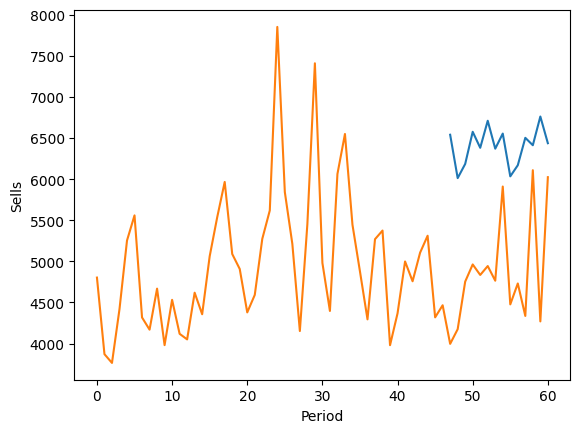

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
y1 = df['y']
#plt.plot(y1)
y2 = forecast['yhat_upper'][-14:]
plt.plot(y2)
plt.plot(y)

In [ ]:
mape(y[-14:],y2[-14:])

33.409331132656575

# Prophet with Regressors

In [ ]:
df = pd.read_excel('/content/Приложение 8 - Данные для пронозирования с кластерами по ценам.xlsx', sheet_name= "km8")

In [ ]:
dfr = df[['Дата', 'Мелкая бытовая техника']]

In [ ]:
dfr

,Дата,Мелкая бытовая техника
0,2016-03-01,"$4,802.84"
1,2016-03-02,"$3,871.70"
2,2016-03-03,"$3,765.30"
3,2016-03-04,"$4,419.57"
4,2016-03-05,"$5,253.82"
...,...,...
56,2016-04-26,"$4,731.23"
57,2016-04-27,"$4,336.62"
58,2016-04-28,"$6,108.25"
59,2016-04-29,"$4,269.93"


In [ ]:
r = df.iloc [:, 2]
r=r[:-14] 

In [ ]:
r2 = df.iloc [:, 2][-14:]

In [ ]:
reg = Prophet()

In [ ]:
reg.add_regressor('r')

In [ ]:
dfr.columns = ['ds', 'y']
train_df = dfr[:-14] 

In [ ]:
train_df['r']=r

In [ ]:
r2

47    $1.00
48    $1.00
49    $0.00
50    $0.00
51    $0.00
52    $0.53
53    $1.12
54   $-1.00
55    $3.00
56    $4.00
57    $2.00
58    $0.00
59   $-0.26
60   $-0.53
Name: Акция , dtype: float64

In [ ]:
r2[51] = -0.3

In [ ]:
r2[50] = -1
r2[51] = -1
r2[49] = -1
r2[54] = -2
r2[55] = -2
r2[56] = -3
r2[57] = 4
r2[58] = -1
r2[49] = -1
r2[47] = 1
r2[48] = 1

In [ ]:
r2[50] = 0
r2[51] = 0
r2[49] = -0
r2[54] = -1
r2[55] = 3
r2[56] = 4
r2[57] = 2
r2[58] = -0
r2[49] = 2
r2[47] = 2
r2[48] = 2

In [ ]:
r2

47    $2.00
48    $2.00
49    $2.00
50    $0.00
51    $0.00
52    $0.53
53    $1.12
54   $-1.00
55    $3.00
56    $4.00
57    $2.00
58    $0.00
59   $-0.26
60   $-0.53
Name: Акция , dtype: float64

In [ ]:
reg.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05y1sbso/g5siz67x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05y1sbso/juez4xf9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3338', 'data', 'file=/tmp/tmp05y1sbso/g5siz67x.json', 'init=/tmp/tmp05y1sbso/juez4xf9.json', 'output', 'file=/tmp/tmp05y1sbso/prophet_modelvdm_3o7z/prophet_model-20230511160326.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:03:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:03:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = reg.make_future_dataframe(periods=14)
future['r']=df.iloc [:, 2]
forecast = reg.predict(future)

In [ ]:
plot_plotly(reg, forecast)

In [ ]:
plot_components_plotly(reg, forecast)

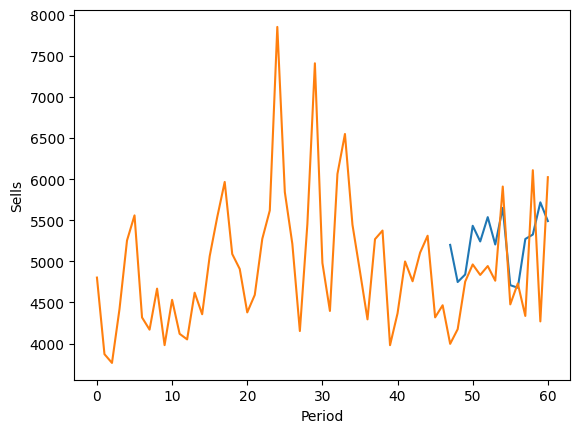

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
y1 = dfr['y']
#plt.plot(y1)
y2 = forecast['yhat'][-14:]
plt.plot(y2)
plt.plot(y)

In [ ]:
mape(y[-14:],y2[-14:])

12.332473646222123

In [ ]:
import statistics

In [ ]:
statistics.mean(y2[-14:])

5217.980897746228

In [ ]:
statistics.mean(y1[22:-22])

5533.040786691507